In [1]:
from keras.preprocessing.image import ImageDataGenerator

In [2]:
batch_size = 32

In [3]:
train_datagen =(
    rescale=1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True
)

In [17]:
# arr = train_datagen
len(test_gen(erator)

157

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.


In [6]:
test_generator = test_datagen.flow_from_directory(
    'test',
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary',
)

Found 5000 images belonging to 2 classes.


In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D

In [11]:
model = Sequential()

model.add(Conv2D(20,kernel_size=(3,3),padding='same',activation='tanh',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(120,kernel_size=(3,3),padding='same',activation='tanh'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(180,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(90,activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
model.fit_generator(
    train_generator,
    steps_per_epoch=625,
    epochs=10,
    validation_data=test_generator,
    validation_steps=157
)

Epoch 1/10


/var/folders/w8/sx8jqns925b45pxmz29f2qxr0000gn/T/ipykernel_2705/1722667136.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


625/625 [==============================] - 78s 124ms/step - loss: 0.5596 - accuracy: 0.7074 - val_loss: 0.5700 - val_accuracy: 0.6934
Epoch 2/10
625/625 [==============================] - 78s 124ms/step - loss: 0.5111 - accuracy: 0.7493 - val_loss: 0.5341 - val_accuracy: 0.7398
Epoch 3/10
625/625 [==============================] - 74s 118ms/step - loss: 0.4704 - accuracy: 0.7757 - val_loss: 0.5010 - val_accuracy: 0.7616
Epoch 4/10
625/625 [==============================] - 76s 122ms/step - loss: 0.4268 - accuracy: 0.8026 - val_loss: 0.4314 - val_accuracy: 0.8052
Epoch 5/10
625/625 [==============================] - 79s 126ms/step - loss: 0.3950 - accuracy: 0.8217 - val_loss: 0.4467 - val_accuracy: 0.7878
Epoch 6/10
625/625 [==============================] - 78s 125ms/step - loss: 0.3717 - accuracy: 0.8346 - val_loss: 0.5470 - val_accuracy: 0.7442
Epoch 7/10
625/625 [==============================] - 78s 125ms/step - loss: 0.3422 - accuracy: 0.8486 - val_loss: 0.4769 - val_accuracy: 0.7

In [20]:
import cv2

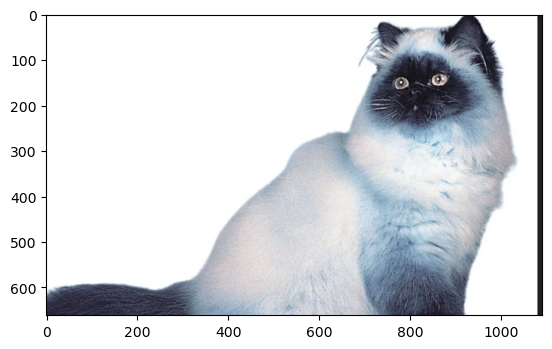

In [53]:
test = cv2.imread('cat.png')
plt.imshow(test)

In [187]:
from keras.preprocessing import image

In [236]:
test = image.load_img('dog6.png', target_size=(150,150))

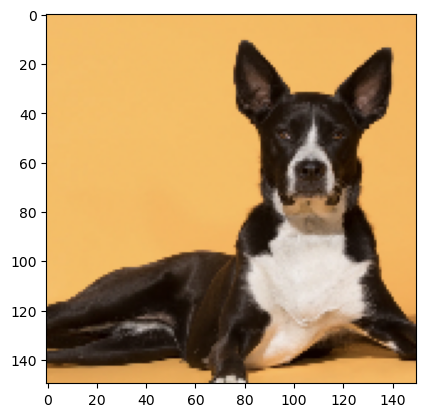

In [237]:
plt.imshow(test)

In [238]:
test = image.img_to_array(test)
test = test.reshape((1,150,150,3))

In [162]:
# test = cv2.imread('dog4.png')
# test = cv2.resize(test, (150,150))
# test = test.reshape((1,150,150,3))

In [239]:
print(model.predict(test))
if model.predict(test) > 0.5:
    print("Dog")
elif model.predict(test) <= 0.5:
    print("Cat")

1/1 [==============================] - 0s 20ms/step
[[0.32362023]]
1/1 [==============================] - 0s 12ms/step
Cat


In [129]:
pred[0]

array([0.5352105], dtype=float32)

In [111]:
model.predict(test)

1/1 [==============================] - 0s 22ms/step


array([[0.2835213]], dtype=float32)

In [130]:
img = next(test_generator)

1/1 [==============================] - 0s 17ms/step


array([[0.9730017]], dtype=float32)

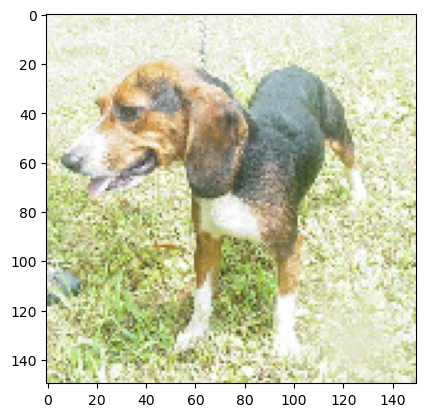

In [227]:
import matplotlib.pyplot as plt
import numpy as np
images, _ = next(test_generator)
plt.imshow(images[0])
# print(model.predict())
a = images[0].reshape(1,150,150,3)
model.predict(a)